In [2]:
# here we will load 3d volume and generate two slices

PET_name = "../James_data_v3/TOFNAC_256_norm/TOFNAC_E4055_norm.nii.gz"
CT0_name = "../James_data_v3/CTACIVV_256_norm/CTACIVV_E4055_norm.nii.gz"
CT1_name = "../James_data_v3/CTACIVV_256_norm/CTACIVV_E4058_norm.nii.gz"

In [3]:
import nibabel as nib

PET_file = nib.load(PET_name)
CT0_file = nib.load(CT0_name)
CT1_file = nib.load(CT1_name)

PET_data = PET_file.get_fdata()
CT0_data = CT0_file.get_fdata()
CT1_data = CT1_file.get_fdata()

print(PET_data.shape)
print(CT0_data.shape)
print(CT1_data.shape)

(256, 256, 467)
(256, 256, 467)
(256, 256, 467)


(-0.5, 255.5, 255.5, -0.5)

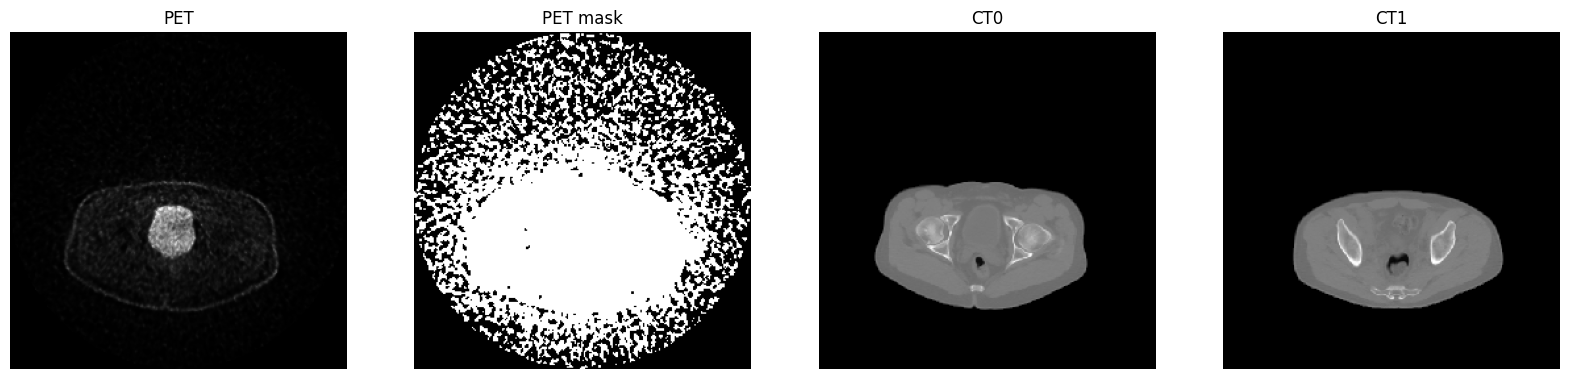

In [13]:
import matplotlib.pyplot as plt
import numpy as np

slice_z = 100

plt.figure(figsize=(20, 5))
plt.subplot(141)
img = np.rot90(PET_data[:, :, slice_z])
plt.imshow(img, cmap="gray")
plt.title("PET")
plt.axis("off")

plt.subplot(142)
img = np.rot90(PET_data[:, :, slice_z])
mask = img > np.percentile(img, 50)
# create a circle centered at center and diameter is 
plt.imshow(mask, cmap="gray")
plt.title("PET mask")
plt.axis("off")

plt.subplot(143)
img = np.rot90(CT0_data[:, :, slice_z])
plt.imshow(img, cmap="gray")
plt.title("CT0")
plt.axis("off")

plt.subplot(144)
img = np.rot90(CT1_data[:, :, slice_z])
plt.imshow(img, cmap="gray")
plt.title("CT1")
plt.axis("off")



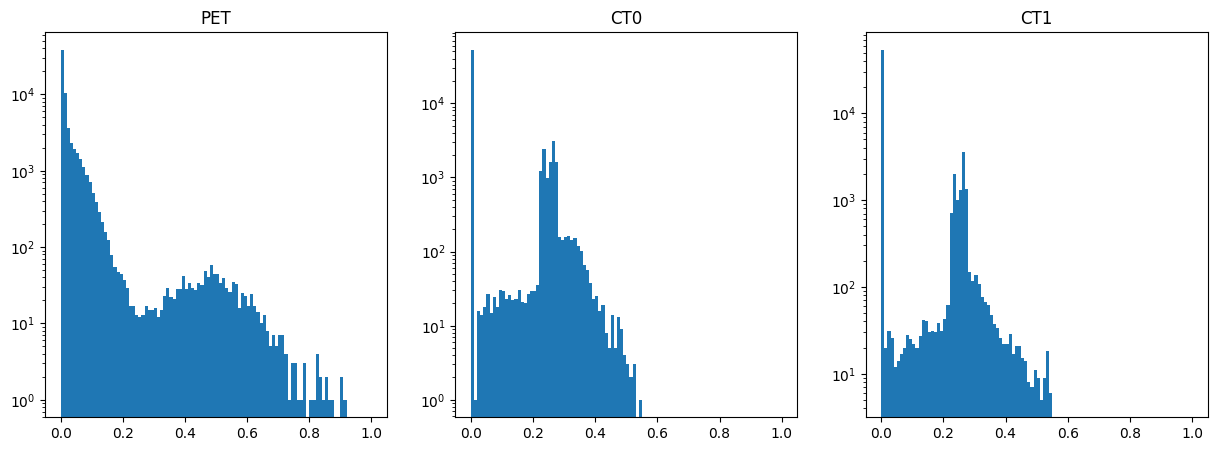

In [9]:
import matplotlib.pyplot as plt
import numpy as np

slice_z = 100

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(PET_data[:, :, slice_z].flatten(), bins=100, range=(0, 1))
plt.title("PET")
plt.yscale("log")

plt.subplot(132)
plt.hist(CT0_data[:, :, slice_z].flatten(), bins=100, range=(0, 1))
plt.title("CT0")
plt.yscale("log")

plt.subplot(133)
plt.hist(CT1_data[:, :, slice_z].flatten(), bins=100, range=(0, 1))
plt.title("CT1")
plt.yscale("log")



In [10]:
# save adjecent slices to numpy files with dict

save_dict = {
    "PET_img": PET_data[:, :, slice_z-1:slice_z+2],
    "CT0_img": CT0_data[:, :, slice_z-1:slice_z+2],
    "CT1_img": CT1_data[:, :, slice_z-1:slice_z+2]
}

# paired E4055, extra E4058, slices at z=100, normalized to [0, 1]
save_name = "../James_data_v3/diffusion_slices/pE4055_E4058_z100_n01.npy"
np.save(save_name, save_dict)
print(f"Saved to {save_name}")

Saved to ../James_data_v3/diffusion_slices/pE4055_E4058_z100_n01.npy
